# CH08_5_Generating Convolution Neural Network using Keras 

- Last upadate : 2022.04.13.

In [18]:
# Training Convolution Neural Network
# 1. Loading Dataset

import tensorflow as tf

(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 2. Spliting Training Dataset into training set and verifying set

from sklearn.model_selection import train_test_split 

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

# 3. Transforming target into one-hot incoding
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

# 4. Preparing input data
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

# 5. Standardization Preprocessing for Input data 
x_train = x_train / 255
x_val = x_val /255

print (">>> x_train.shape / x_val =\n", x_train.shape,'/', x_val)
x_train

>>> x_train.shape / x_val =
 (48000, 28, 28, 1) / [[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

## # Generating Convolution Neural Network using Keras

In [5]:
# 1. Importing required classes

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
# 2. Stacking Convolution layers 

conv1 = tf.keras.Sequential()
print (">>> conv1 =", conv1)
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
print (">>> conv1 =", conv1)

>>> conv1 = <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000014BC3314588>
>>> conv1 = <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000014BC3314588>


In [7]:
# 3. Stacking pooling layers 

conv1.add(MaxPooling2D((2, 2)))
print (">>> conv1 =", conv1)

>>> conv1 = <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000014BC3314588>


In [8]:
# 4. Flatting feature map to insert in fully connected layer

conv1.add(Flatten())
print (">>> conv1 =", conv1)

>>> conv1 = <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000014BC3314588>


In [9]:
# 5. Stacking fullly conntected layers 

conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [10]:
# 6. Observing the Model Structure 
conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


## # Training Convolution Neural Network 

In [11]:
# 1. Model compling and Training 

conv1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# 2. Applying Adaptive Movement Estimation(ADAM) Optimzier 

history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4282 - accuracy: 0.8491 - val_loss: 0.3371 - val_accuracy: 0.8763
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2936 - accuracy: 0.8931 - val_loss: 0.2859 - val_accuracy: 0.8966
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2516 - accuracy: 0.9077 - val_loss: 0.2646 - val_accuracy: 0.9030
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2214 - accuracy: 0.9185 - val_loss: 0.2662 - val_accuracy: 0.9049
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1966 - accuracy: 0.9276 - val_loss: 0.2539 - val_accuracy: 0.9128
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1768 - accuracy: 0.9346 - val_loss: 0.2617 - val_accuracy: 0.9084
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1614 - accuracy: 0.9398 - val_loss: 0.2639 - val_accuracy:

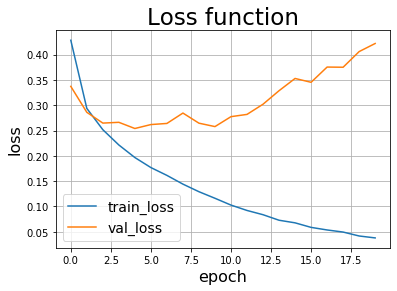

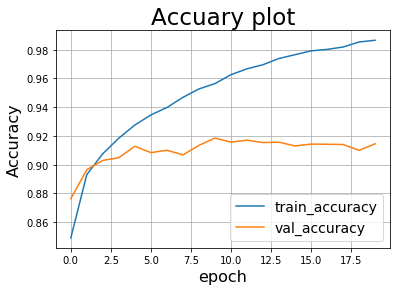

In [13]:
# 3. Checking out loss graph and accuracy graph
# 3.1. loss graph

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss', fontsize='16')
plt.xlabel('epoch', fontsize='16')
plt.title('Loss function', fontsize='23')
plt.legend(['train_loss', 'val_loss'], fontsize='14')

plt.grid()
plt.show()


# 3.2. Accuracy graph 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy', fontsize ='16')
plt.xlabel('epoch', fontsize ='16')
plt.title('Accuary plot', fontsize ='23')
plt.legend(['train_accuracy', 'val_accuracy'], fontsize='14')

plt.grid()
plt.show()

## # What is Dropout? 

In [14]:
# 1. Applying dropout in Convolution Neural Network made of Keras 

from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))

conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [15]:
# 2. Checking out Dropout layer 

conv2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [16]:
# 3. Training 

conv2.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics= ['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5108 - accuracy: 0.8159 - val_loss: 0.3638 - val_accuracy: 0.8686
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3753 - accuracy: 0.8632 - val_loss: 0.3170 - val_accuracy: 0.8850
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3332 - accuracy: 0.8765 - val_loss: 0.2780 - val_accuracy: 0.8993
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3068 - accuracy: 0.8860 - val_loss: 0.2686 - val_accuracy: 0.9012
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2854 - accuracy: 0.8932 - val_loss: 0.2574 - val_accuracy: 0.9073
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2674 - accuracy: 0.9011 - val_loss: 0.2494 - val_accuracy: 0.9097
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2534 - accuracy: 0.9064 - val_loss: 0.2416 - val_accuracy:

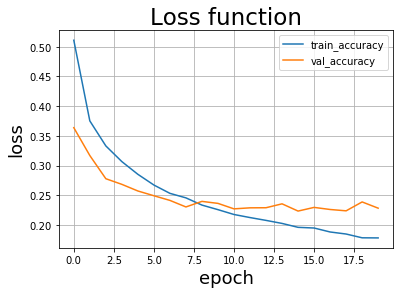

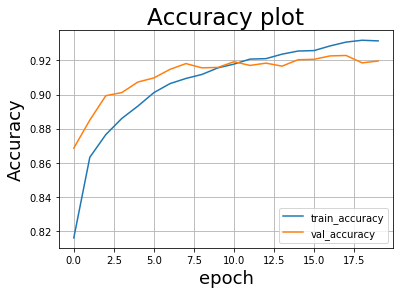

In [17]:
# 4. Plotting loss graph and accuracy graph 
# 4.1. Plotting loss graph 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss', fontsize ='18')
plt.xlabel('epoch', fontsize ='18')
plt.title('Loss function', fontsize ='23')
plt.legend(['train_accuracy', 'val_accuracy'])

plt.grid()
plt.show()

# 4.2. plotting accuracy graph 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy', fontsize ='18')
plt.xlabel('epoch', fontsize ='18')
plt.title('Accuracy plot', fontsize ='23')
plt.legend(['train_accuracy', 'val_accuracy'])

plt.grid()
plt.show()